In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('D:/Dhirendra/100_DAYS_DS/stats/mercedes-benz-greener-manufacturing/train/train.csv', usecols =["X0","X1", "X2", "X3", "X4","X5","X6", "X8"])

### Feature Engineering Handling Categorical Data
1. ONE HOT ENCODING
2. KDD CUP ORNAGE ENCODING
3. COUNT FREQUENCY ENCODING
4. ORDINAL ENCODING

In [2]:
df.head()
df.shape

(4209, 8)

In [3]:
for col in df.columns:
    print(col, ': ', len(df[col].unique()), ' labels')

X0 :  47  labels
X1 :  27  labels
X2 :  44  labels
X3 :  7  labels
X4 :  4  labels
X5 :  29  labels
X6 :  12  labels
X8 :  25  labels


In [4]:
feature = list(df.columns)
feature

['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']

In [5]:
low_cardinality_cols = [cname for cname in df.columns if df[cname].nunique() <= 12 and 
                        df[cname].dtype == "object"]
low_cardinality_cols

['X3', 'X4', 'X6']

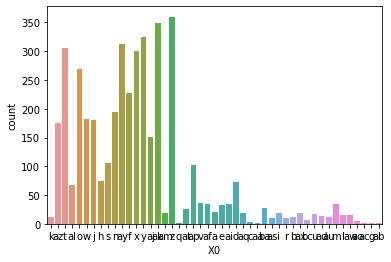

<Figure size 2160x1296 with 0 Axes>

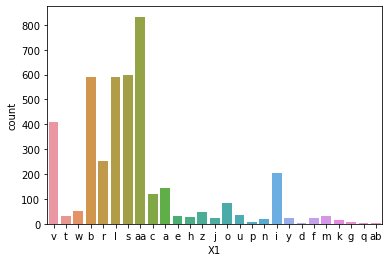

<Figure size 2160x1296 with 0 Axes>

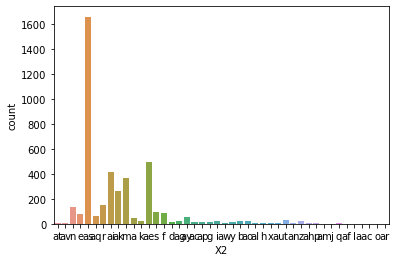

<Figure size 2160x1296 with 0 Axes>

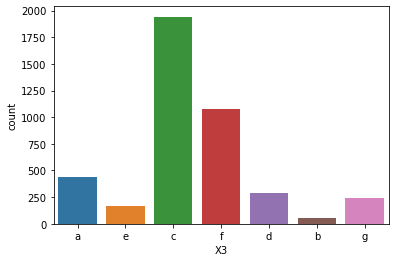

<Figure size 2160x1296 with 0 Axes>

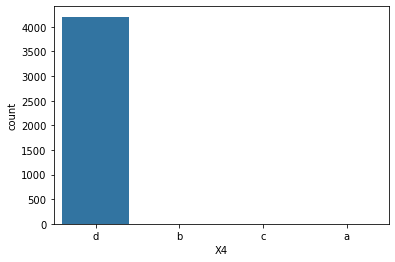

<Figure size 2160x1296 with 0 Axes>

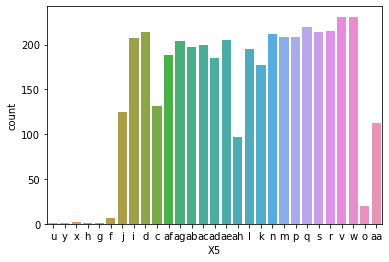

<Figure size 2160x1296 with 0 Axes>

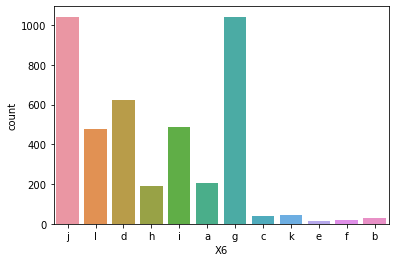

<Figure size 2160x1296 with 0 Axes>

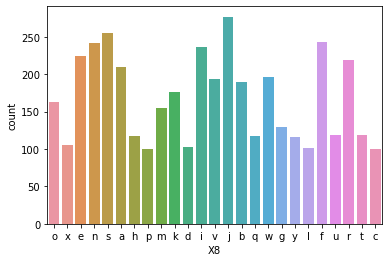

<Figure size 2160x1296 with 0 Axes>

In [6]:
for feature in feature:
    sns.countplot(data=df, x=feature)
    plt.figure(figsize=(30,18))
    plt.show()

In [7]:
df.shape

(4209, 8)

In [8]:
df_new = pd.get_dummies(data=df, columns=['X3', 'X4', 'X6'], drop_first=True)
df_new

,X0,X1,X2,X5,X8,X3_b,X3_c,X3_d,X3_e,X3_f,...,X6_c,X6_d,X6_e,X6_f,X6_g,X6_h,X6_i,X6_j,X6_k,X6_l
0,k,v,at,u,o,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,k,t,av,y,o,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,az,w,n,x,x,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,az,t,n,x,e,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,az,v,n,h,n,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,ak,s,as,aa,q,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4205,j,o,t,aa,h,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4206,ak,v,r,aa,e,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4207,al,r,e,aa,u,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [9]:
df_new.shape

(4209, 25)

In [10]:
df.head()

,X0,X1,X2,X3,X4,X5,X6,X8
0,k,v,at,a,d,u,j,o
1,k,t,av,e,d,y,l,o
2,az,w,n,c,d,x,j,x
3,az,t,n,f,d,x,l,e
4,az,v,n,f,d,h,d,n


 #### 2. Now Using KDD Cup Challenge Encoding Technique We will Be ONE-HOT Encoding Top 10 Categories .
##### the Reasons for using this technique when Features Having Large Number Of Categories so when we one hot encode all the categories it will increase the dimensity of dataframe and lead us to dimensity curse.

In [11]:
def find_value_count(df,feature):
    return df[feature].value_counts().sort_values(ascending=False).head(20)

In [12]:
## these columns ["X0","X1","X2","X5","X8"] we need to encode using onehot encoding
find_value_count(df,"X0")

z     360
ak    349
y     324
ay    313
t     306
x     300
o     269
f     227
n     195
w     182
j     181
az    175
aj    151
s     106
ap    103
h      75
d      73
al     67
v      36
af     35
Name: X0, dtype: int64

In [13]:
### step 1. get 10 lables for features
def top_10(df,feature):
    top_10_labels = [y for y in df[feature].value_counts().sort_values(ascending=False).head(10).index]
    return top_10_labels

In [14]:
### step 2. create a function which applys one hot encoding on top_10_lable for every feature
def ohe_top_10(df, feature, top_10_labels):
    # function to create the dummy variables for the most frequent labels
    # we can vary the number of most frequent labels that we encode
    
    for label in top_10_labels:
        df[feature+'_'+label] = np.where(df_new[feature]==label, 1, 0)

        

In [15]:
###we apply one hot encoding calling function
new = ["X0","X1","X2","X5","X8"]
for feature in new:
    ohe_top_10(df_new, feature, top_10(df_new,feature))
df_new.head()


,X0,X1,X2,X5,X8,X3_b,X3_c,X3_d,X3_e,X3_f,...,X8_j,X8_s,X8_f,X8_n,X8_i,X8_e,X8_r,X8_a,X8_w,X8_v
0,k,v,at,u,o,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,k,t,av,y,o,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,az,w,n,x,x,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,az,t,n,x,e,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,az,v,n,h,n,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [16]:
df_new.drop(["X0","X1","X2","X5","X8"], axis = 1)

,X3_b,X3_c,X3_d,X3_e,X3_f,X3_g,X4_b,X4_c,X4_d,X6_b,...,X8_j,X8_s,X8_f,X8_n,X8_i,X8_e,X8_r,X8_a,X8_w,X8_v
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4205,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4206,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4207,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
import datetime
df_base = datetime.datetime.today()
df_date_list = [df_base - datetime.timedelta(days=x) for x in range(0, 20)]
df = pd.DataFrame(df_date_list)
df.columns = ['day']
df

,day
0,2022-03-11 19:35:11.218851
1,2022-03-10 19:35:11.218851
2,2022-03-09 19:35:11.218851
3,2022-03-08 19:35:11.218851
4,2022-03-07 19:35:11.218851
5,2022-03-06 19:35:11.218851
6,2022-03-05 19:35:11.218851
7,2022-03-04 19:35:11.218851
8,2022-03-03 19:35:11.218851
9,2022-03-02 19:35:11.218851


In [18]:
df['day_of_week'] = df['day'].dt.day_name()
df.head()

,day,day_of_week
0,2022-03-11 19:35:11.218851,Friday
1,2022-03-10 19:35:11.218851,Thursday
2,2022-03-09 19:35:11.218851,Wednesday
3,2022-03-08 19:35:11.218851,Tuesday
4,2022-03-07 19:35:11.218851,Monday


In [19]:
## method 1. using sklearn LabelEncoder and ordinalEncoder Methods we are encoding our day_of_week column 
## we can skip LabelEncoder here because it is used to encode target variable, there is no target variable here
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [20]:
ordinal_encoder = OrdinalEncoder()
df[['day_of_week']] = ordinal_encoder.fit_transform(df[['day_of_week']])

In [21]:
df

,day,day_of_week
0,2022-03-11 19:35:11.218851,0.0
1,2022-03-10 19:35:11.218851,4.0
2,2022-03-09 19:35:11.218851,6.0
3,2022-03-08 19:35:11.218851,5.0
4,2022-03-07 19:35:11.218851,1.0
5,2022-03-06 19:35:11.218851,3.0
6,2022-03-05 19:35:11.218851,2.0
7,2022-03-04 19:35:11.218851,0.0
8,2022-03-03 19:35:11.218851,4.0
9,2022-03-02 19:35:11.218851,6.0


## Note:
##### both have the same functionality. A bit difference is the idea behind. OrdinalEncoder is for converting features, while LabelEncoder is for converting target variable.

##### That's why OrdinalEncoder can fit data that has the shape of (n_samples, n_features) while LabelEncoder can only fit data that has the shape of (n_samples,) (though in the past one used LabelEncoder within the loop to handle what has been becoming the job of OrdinalEncoder now)

In [22]:
## method 2 manually using dictionary
df_base = datetime.datetime.today()
df_date_list = [df_base - datetime.timedelta(days=x) for x in range(0, 20)]
df_new = pd.DataFrame(df_date_list)
df_new.columns = ['day']


In [23]:
df_new['day_of_week'] = df_new['day'].dt.day_name()
df_new.head()

,day,day_of_week
0,2022-03-11 19:35:12.557669,Friday
1,2022-03-10 19:35:12.557669,Thursday
2,2022-03-09 19:35:12.557669,Wednesday
3,2022-03-08 19:35:12.557669,Tuesday
4,2022-03-07 19:35:12.557669,Monday


In [24]:

weekday_map = {'Monday':1,
               'Tuesday':2,
               'Wednesday':3,
               'Thursday':4,
               'Friday':5,
               'Saturday':6,
               'Sunday':7
}

df_new['day_ordinal'] = df_new.day_of_week.map(weekday_map)
df_new.head(20)

,day,day_of_week,day_ordinal
0,2022-03-11 19:35:12.557669,Friday,5
1,2022-03-10 19:35:12.557669,Thursday,4
2,2022-03-09 19:35:12.557669,Wednesday,3
3,2022-03-08 19:35:12.557669,Tuesday,2
4,2022-03-07 19:35:12.557669,Monday,1
5,2022-03-06 19:35:12.557669,Sunday,7
6,2022-03-05 19:35:12.557669,Saturday,6
7,2022-03-04 19:35:12.557669,Friday,5
8,2022-03-03 19:35:12.557669,Thursday,4
9,2022-03-02 19:35:12.557669,Wednesday,3


#### Method 4. Frequecy Encoding
**Frequency Encoding is an encoding technique which encodes categorical feature values to their frequencies**
    
***This will preserve the information about the values of distributions.***

In [25]:
df_freq = pd.read_csv('D:/Dhirendra/100_DAYS_DS/stats/mercedes-benz-greener-manufacturing/train/train.csv', usecols =["X0","X1", "X2", "X3", "X4","X5","X6", "X8"])

In [26]:
df_freq.head()

,X0,X1,X2,X3,X4,X5,X6,X8
0,k,v,at,a,d,u,j,o
1,k,t,av,e,d,y,l,o
2,az,w,n,c,d,x,j,x
3,az,t,n,f,d,x,l,e
4,az,v,n,f,d,h,d,n


In [28]:
def freq(df_freq, feature):
    enc_x0_fre = (df_freq.groupby(feature).size()) / len(df_freq)
    enc_x0_fre = enc_x0_fre.to_dict()
    return enc_x0_fre

In [30]:
for feature in df_freq.columns:
    df_freq[feature] = df_freq[feature].map(freq(df_freq, feature))
df_freq

,X0,X1,X2,X3,X4,X5,X6,X8
0,0.007840,0.096935,0.002851,0.104538,0.99905,0.000950,0.246852,0.038727
1,0.007840,0.007365,0.002851,0.038727,0.99905,0.000950,0.113566,0.038727
2,0.041578,0.012354,0.032549,0.461392,0.99905,0.000475,0.246852,0.024947
3,0.041578,0.007365,0.032549,0.255643,0.99905,0.000475,0.113566,0.053457
4,0.041578,0.096935,0.032549,0.255643,0.99905,0.000950,0.148491,0.057496
...,...,...,...,...,...,...,...,...
4204,0.082918,0.142077,0.394155,0.461392,0.99905,0.026610,0.148491,0.055595
4205,0.043003,0.019482,0.006890,0.068900,0.99905,0.026610,0.045141,0.055595
4206,0.082918,0.096935,0.036351,0.104538,0.99905,0.026610,0.247565,0.053457
4207,0.015918,0.059634,0.019244,0.255643,0.99905,0.026610,0.113566,0.056545


### Method 5 Taregt Guided Ordinal Encoding
we calculate the mean of each categorical variable based on the output and then rank them

1. Ordering the labels according to the mean of target variable
2. Replace the labels by the joint probability of being 1 or 0